In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/raw/srcsc-2025-economic-data-summary.xlsx', sheet_name='Inflation-Interest') 

In [3]:
df_trim = df.iloc[11:, :5]

In [4]:
df_trim.columns = ['Year', 'Inflation', 'Government of Tarrodan Overnight Rate', 
              '1-yr Risk Free Annual Spot Rate', '10-yr Risk Free Annual Spot Rate']

In [5]:
df_trim = df_trim.apply(pd.to_numeric, errors='coerce')
df_trim.set_index('Year', inplace=True)

In [6]:
ts_inflation = df_trim['Inflation']
model = sm.tsa.ARIMA(ts_inflation, order=(1, 1, 1))
results = model.fit()

/home/steven/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/steven/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/steven/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
forecast_obj = results.get_forecast(steps=10)
forecast_mean = forecast_obj.predicted_mean
forecast_conf = forecast_obj.conf_int()

/home/steven/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/steven/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower CI': forecast_conf.iloc[:, 0],
    'Upper CI': forecast_conf.iloc[:, 1]
})

print("\n--- 10-Year Forecast ---")
print(forecast_df)



--- 10-Year Forecast ---
    Forecast  Lower CI  Upper CI
63  0.025525 -0.006184  0.057235
64  0.027825 -0.013937  0.069587
65  0.029765 -0.018078  0.077609
66  0.031402 -0.020493  0.083298
67  0.032784 -0.021938  0.087505
68  0.033949 -0.022800  0.090699
69  0.034932 -0.023301  0.093166
70  0.035762 -0.023574  0.095099
71  0.036462 -0.023704  0.096629
72  0.037053 -0.023746  0.097852


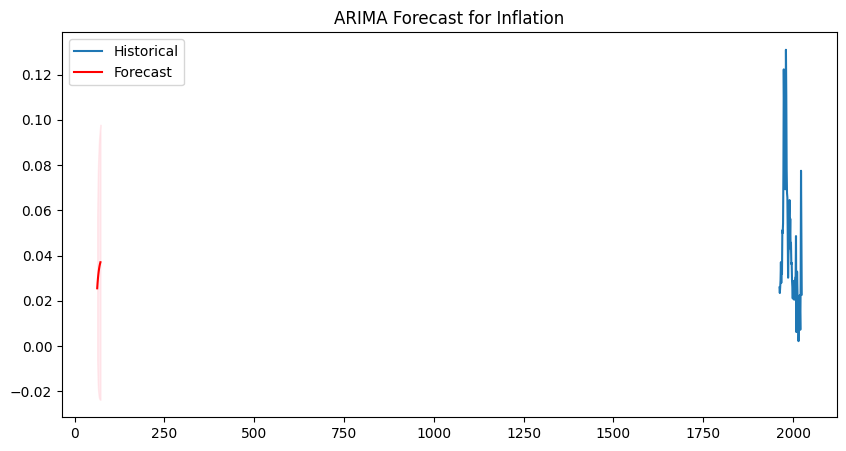

In [10]:
plt.figure(figsize=(10,5))
plt.plot(ts_inflation, label='Historical')
plt.plot(forecast_df['Forecast'], color='red', label='Forecast')
plt.fill_between(forecast_df.index,
                 forecast_df['Lower CI'],
                 forecast_df['Upper CI'],
                 color='pink', alpha=0.3)
plt.title('ARIMA Forecast for Inflation')
plt.legend()
plt.show()